In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

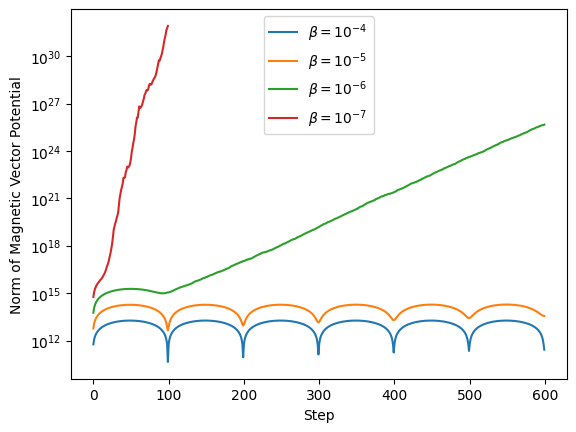

In [64]:
fig, ax = plt.subplots()

for v in range(4, 8):
    df = pd.read_csv(f"results/beta_{10**-v:.0e}.csv")
    ax.plot(df["step"], df["norm"], label=fr"$\beta = 10^{{-{v}}} $ ")

ax.set_yscale('log')
ax.set_xlabel("Step")
ax.set_ylabel("Norm of Magnetic Vector Potential")
ax.legend()
fig.savefig("results/compare_beta.pdf", bbox_inches='tight', dpi=200)


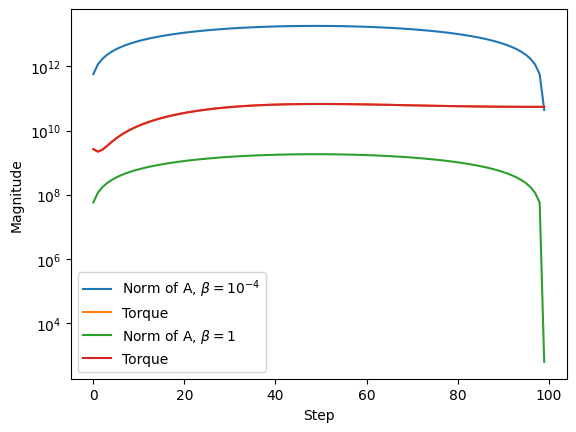

In [78]:
fig, ax = plt.subplots()

df = pd.read_csv(f"results/torque.csv")
ax.plot(df["step"], df["norm_A"], label=fr"Norm of A, $\beta = 10^{{-4}}$")
ax.plot(df["step"], df["torque"], label=f"Torque")
# df1 = pd.read_csv(f"results/torque_beta_1.csv")
# ax.plot(df1["step"], df1["norm_A"], label=r"Norm of A, $\beta = 1$")
# ax.plot(df1["step"], df1["torque"], label=f"Torque")

ax.set_yscale('log')
ax.set_xlabel("Step")
ax.set_ylabel("Magnitude")
ax.legend()
fig.savefig("results/torque.pdf", bbox_inches='tight', dpi=200)